# Question-2

In [1]:
import numpy as np
import scipy as scp
import pandas as pd 
import warnings 

warnings.filterwarnings("ignore")

In [2]:
signups = pd.read_csv('signups_new.csv')
visits = pd.read_csv('visits_new.csv')

In [3]:
signups.head(10)

,Unnamed: 0,Unnamed: 0.1,uid,signup_dt,auth_type,device,year,month,day
0,0,1,21639492,2016-06-01,C,1,2016,6,1
1,1,2,21640161,2016-06-01,A,6,2016,6,1
2,2,3,21640773,2016-06-01,C,5,2016,6,1
3,3,4,21641605,2016-06-01,A,1,2016,6,1
4,4,5,21643130,2016-06-01,C,6,2016,6,1
5,5,6,21644509,2016-06-01,C,1,2016,6,1
6,6,7,21645033,2016-06-01,A,2,2016,6,1
7,7,8,21645932,2016-06-01,C,2,2016,6,1
8,8,9,21645974,2016-06-01,C,1,2016,6,1
9,9,10,21646765,2016-06-01,A,1,2016,6,1


In [4]:
visits.head(10)

,Unnamed: 0,Unnamed: 0.1,uid,dt,year,month,day
0,0,1,21655745,2016-11-11,2016,11,11
1,1,2,22635182,2016-11-02,2016,11,2
2,2,3,22361195,2016-07-24,2016,7,24
3,3,4,22132291,2017-03-19,2017,3,19
4,4,5,22639754,2017-02-15,2017,2,15
5,5,6,22998116,2016-09-06,2016,9,6
6,6,7,23344314,2016-10-05,2016,10,5
7,7,8,22422820,2016-11-14,2016,11,14
8,8,9,23642588,2017-04-07,2017,4,7
9,9,10,23705466,2016-10-21,2016,10,21


In [5]:
month = [6,7,8,9,10,11,12,1,2,3,4]
day = [30,31,31,30,31,30,31,31,28,31,30]
list = []

for i in range(0,len(month)):
    for j in range(1,day[i]+1):
            list.append([month[i],j])

In [6]:
import datetime

#the heat map has to be 152 rows and 25 columns
sign_dates = signups['signup_dt'].unique() #there are 152 dates from 06/01-10/30
visit_dates = visits['dt'].unique()

nu_signed_up = np.zeros(152)
proportion = np.zeros([152,24])

signups_group_date = signups.groupby('signup_dt')

fmt = '%Y-%m-%d'

for i in range(0,152): 
    temp = signups_group_date.get_group(sign_dates[i])
    
    dt = datetime.datetime.strptime(sign_dates[i], fmt)
    day = dt.day
    month = dt.month
    nu_signed_up[i] = temp['uid'].shape[0]
    
    for j in range(0,24): #need to calculate for 24 weeks
    
        #calculating the month and day of the start and end of week
        m_min = list[i+1+7*j][0]
        m_max = list[i+7+7*j][0]
    
        d_min = list[i+1+7*j][1]
        d_max = list[i+7+7*j][1]
        
        if(m_min == m_max):
            segmented_visits = visits[((visits['day']>=d_min) & (visits['month']==m_min)) & ((visits['day']<=d_max) & (visits['month']==m_max))]
        else:
            segmented_visits = visits[((visits['day']>=d_min) & (visits['month']==m_min)) | ((visits['day']<=d_max) & (visits['month']==m_max))]
            
        signup_visits = pd.merge(temp,segmented_visits,how = 'inner',on = 'uid')
        proportion[i,j] = signup_visits['uid'].nunique()/nu_signed_up[i]

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


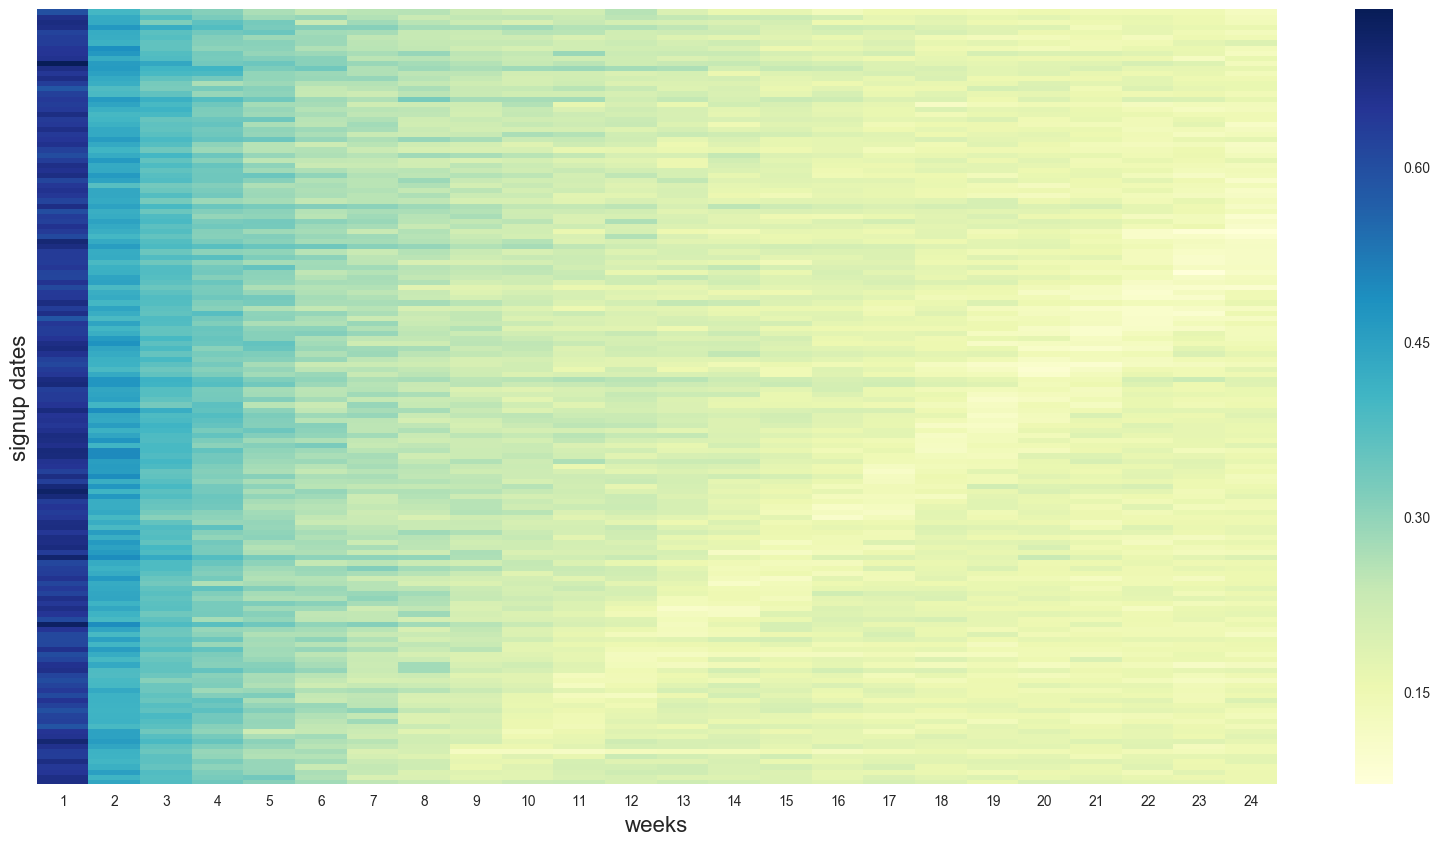

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%pylab inline

fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
ax = sns.heatmap(proportion,xticklabels=labels,yticklabels=False,ax=ax,cmap="YlGnBu")
plt.xlabel('weeks',fontsize=16)
plt.ylabel('signup dates',fontsize=16)
savefig('heatmap1.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='letter', format='pdf',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()

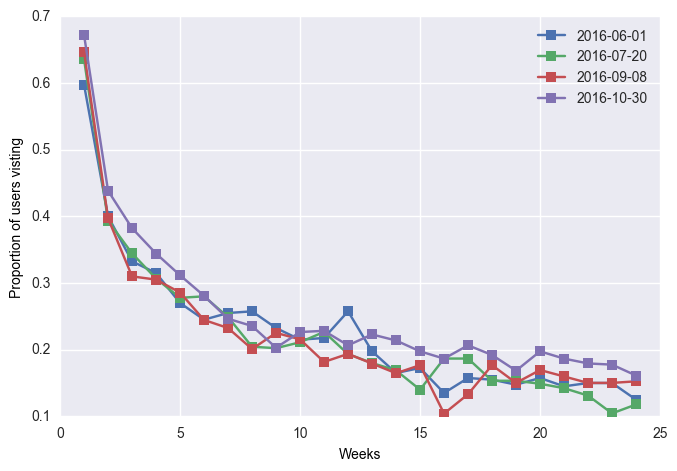

In [9]:
legend_label = ['2016-06-01','2016-07-20','2016-09-08','2016-10-30']

plt.figure(2)
plt.plot(labels,proportion[0,:],'-s',label = legend_label[0])
plt.plot(labels,proportion[49,:],'-s',label = legend_label[1])
plt.plot(labels,proportion[99,:],'-s',label = legend_label[2])
plt.plot(labels,proportion[151,:],'-s',label = legend_label[3])

plt.xlabel("Weeks",color = "k",size = '10')
plt.ylabel("Proportion of users visting",color = "k",size = '10')
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.legend(loc=1)
plt.subplots_adjust(left=0, bottom=0, right=1.0, top=1, wspace=0, hspace=0)
plot_margin = 0.25
savefig('users_vs_weeks.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='letter', format='pdf',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()

# Question-3

In [10]:
signups_group_auth = signups.groupby('auth_type')
auth_type = ['A','B','C']
vec = [53,78]
nu_signed_up_2days = np.zeros(2)
proportion_2days = np.zeros([2,24,3])

for i in range(0,3): #for 3 auth types
    temp_auth_type = signups_group_auth.get_group(auth_type[i]) #extract dataframe by auth type
    temp_group_date = temp_auth_type.groupby('signup_dt')
    
    for j in range(0,2): #only for 2 dates 
        temp_date = temp_group_date.get_group(sign_dates[vec[j]])
        
        nu_signed_up_2days[j] = temp_date['uid'].shape[0]
        
        for k in range(0,24):
            #calculating the month and day of the start and end of week
            m_min = list[vec[j]+1+7*k][0]
            m_max = list[vec[j]+7+7*k][0]
    
            d_min = list[vec[j]+1+7*k][1]
            d_max = list[vec[j]+7+7*k][1]
            if(m_min == m_max):
                segmented_visits = visits[((visits['day']>=d_min) & (visits['month']==m_min)) & ((visits['day']<=d_max) & (visits['month']==m_max))]
            else:
                segmented_visits = visits[((visits['day']>=d_min) & (visits['month']==m_min)) | ((visits['day']<=d_max) & (visits['month']==m_max))]
            signup_visits_by_auth_type = pd.merge(temp_date,segmented_visits,how = 'inner',on = 'uid')
            proportion_2days[j,k,i] = signup_visits_by_auth_type['uid'].nunique()/nu_signed_up_2days[j]

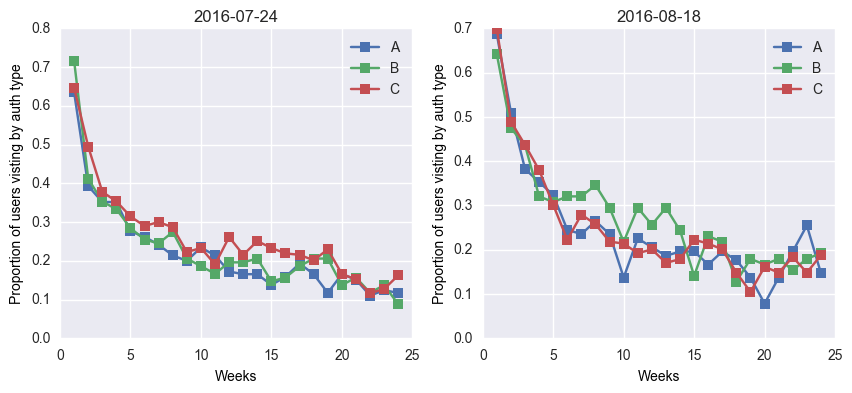

In [11]:
plt.figure(3,figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(labels,proportion_2days[0,:,0],'-s',label = auth_type[0])
plt.plot(labels,proportion_2days[0,:,1],'-s',label = auth_type[1])
plt.plot(labels,proportion_2days[0,:,2],'-s',label = auth_type[2])
plt.xlabel("Weeks",color = "k",size = '10')
plt.ylabel("Proportion of users visting by auth type",color = "k",size = '10')
plt.title('2016-07-24')
plt.legend(loc=1)
# plt.subplots_adjust(left=0, bottom=0, right=1.0, top=1, wspace=0, hspace=0)
plot_margin = 0.25

plt.subplot(1,2,2)
plt.plot(labels,proportion_2days[1,:,0],'-s',label = auth_type[0])
plt.plot(labels,proportion_2days[1,:,1],'-s',label = auth_type[1])
plt.plot(labels,proportion_2days[1,:,2],'-s',label = auth_type[2])
plt.xlabel("Weeks",color = "k",size = '10')
plt.ylabel("Proportion of users visting by auth type",color = "k",size = '10')
plt.title('2016-08-18')
plt.legend(loc=1)
# plt.subplots_adjust(left=0, bottom=0, right=1.0, top=1, wspace=0, hspace=0)
plot_margin = 0.25
plt.show()

# Question-4

In [12]:
nu_signed_up = np.zeros(152)
proportion = np.zeros([152,24])
sign_dates = signups['signup_dt'].unique() #there are 152 dates from 06/01-10/30
visit_dates = visits['dt'].unique()

signups_group_date = signups.groupby('signup_dt')

for i in range(0,152): 
    temp = signups_group_date.get_group(sign_dates[i])
    
    nu_signed_up[i] = temp['uid'].shape[0]
    
    for j in range(0,24): #need to calculate for 24 weeks
    
        #calculating the month and day of the start and end of week
        m_min = list[i+1][0]
        m_max = list[i+7+7*j][0]
    
        d_min = list[i+1][1]
        d_max = list[i+7+7*j][1] 
        if(m_min == m_max):
            segmented_visits = visits[((visits['day']>=d_min) & (visits['month']==m_min)) & ((visits['day']<=d_max) & (visits['month']==m_max))]
        else:
            if(m_max - m_min > 1):
                segmented_visits = visits[((visits['day']>=d_min) & (visits['month']==m_min)) | ((visits['day']<=d_max) & (visits['month']==m_max)) | ((visits['month'] < m_max) & (visits['month'] > m_min))]
            if(m_max - m_min == 1):
                segmented_visits = visits[((visits['day']>=d_min) & (visits['month']==m_min)) | ((visits['day']<=d_max) & (visits['month']==m_max))]            
        signup_visits_withinweek = pd.merge(temp,segmented_visits,how = 'inner',on = 'uid')        
        proportion[i,j] = signup_visits_withinweek['uid'].nunique()/nu_signed_up[i]

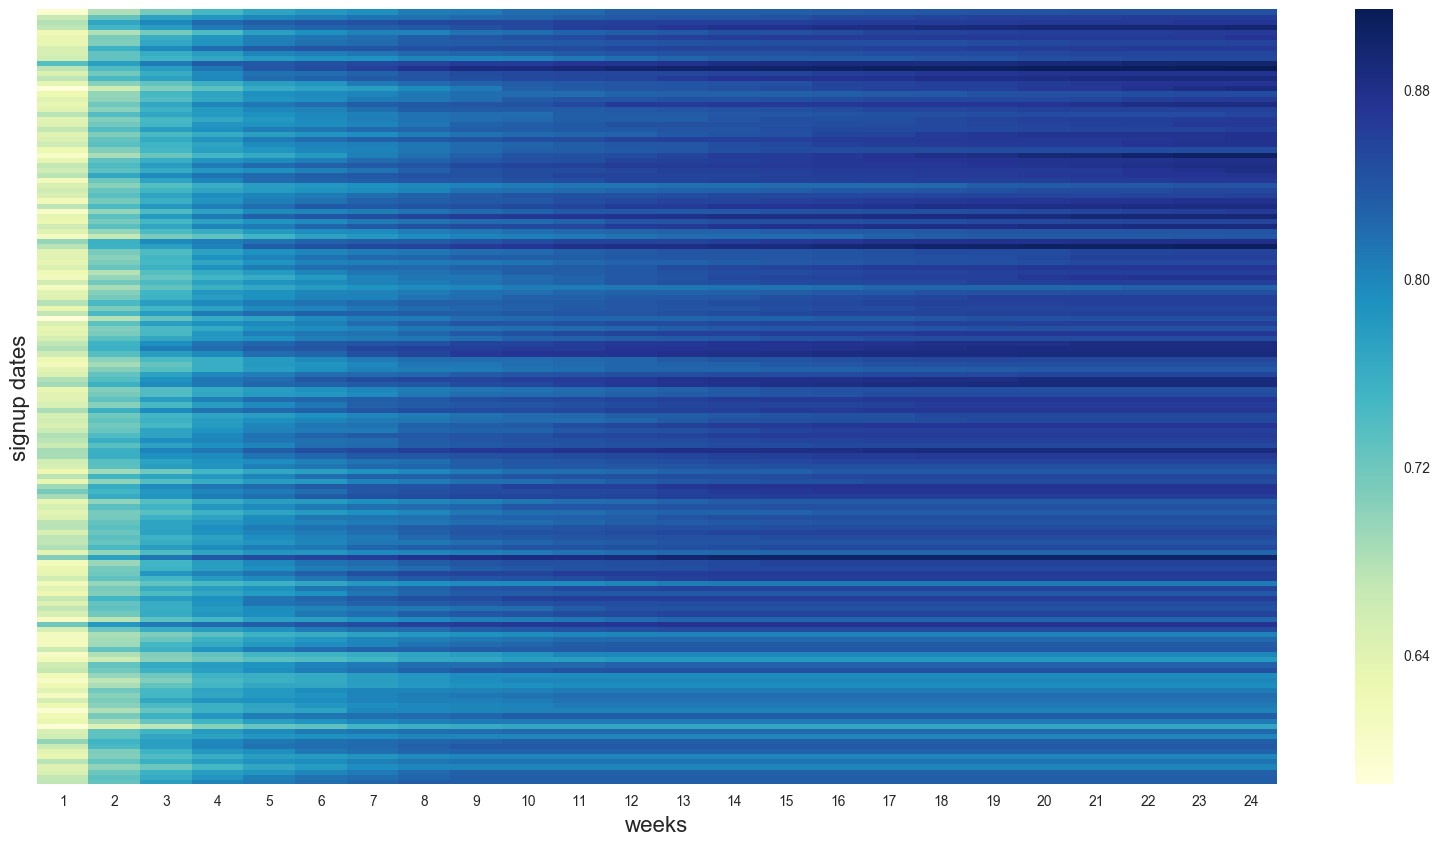

In [16]:
fig, ax = plt.subplots(figsize=(20,10)) 
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
ax = sns.heatmap(proportion,xticklabels=labels,yticklabels=False,ax=ax,cmap="YlGnBu")
plt.xlabel('weeks',fontsize=16)
plt.ylabel('signup dates',fontsize=16)
savefig('heatmap2.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='letter', format='pdf',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()

In [14]:
y = 1 - proportion[:,23]
np.mean(y)

0.146074896295075

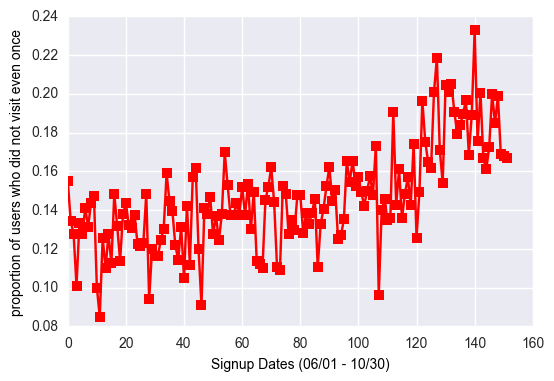

In [17]:
plt.figure(5)
x = np.arange(152)
plt.plot(x,y,'-s',color = 'red')
plt.xlabel("Signup Dates (06/01 - 10/30)",color = "k",size = '10')
plt.ylabel("proportion of users who did not visit even once",color = "k",size = '10')
savefig('novisits.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='letter', format='pdf',
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None)
plt.show()